# Titanic survived Project

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


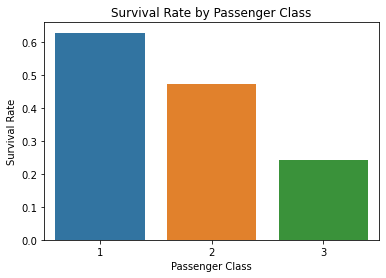

In [7]:
survival_by_class = df.groupby('Pclass')['Survived'].mean()

sns.barplot(x=survival_by_class.index, y=survival_by_class.values)
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Passenger Class')
plt.show()

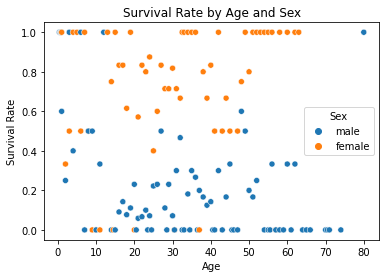

In [10]:
survival_by_age_sex = df.groupby(['Age', 'Sex'])['Survived'].mean().reset_index()

sns.scatterplot(data=survival_by_age_sex, x='Age', y='Survived', hue='Sex')
plt.xlabel('Age')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Age and Sex')
plt.show()

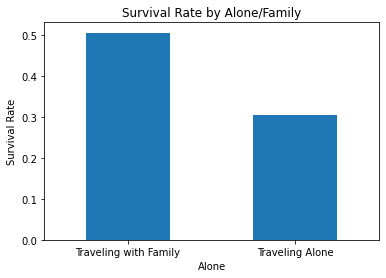

In [11]:
df['Family'] = df['SibSp'] + df['Parch']
df['Alone'] = np.where(df['Family'] == 0, 1, 0)

grouped = df.groupby('Alone')['Survived'].mean()
grouped.plot(kind='bar')
plt.title('Survival Rate by Alone/Family')
plt.ylabel('Survival Rate')
plt.xticks([0, 1], ['Traveling with Family', 'Traveling Alone'], rotation=0)
plt.show()

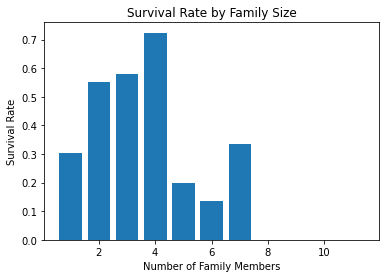

In [12]:
df['FamilySize'] = df['SibSp'] +df['Parch'] + 1

survival_by_family_size = df.groupby('FamilySize')['Survived'].mean()

plt.bar(survival_by_family_size.index, survival_by_family_size.values)
plt.xlabel('Number of Family Members')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Family Size')
plt.show()

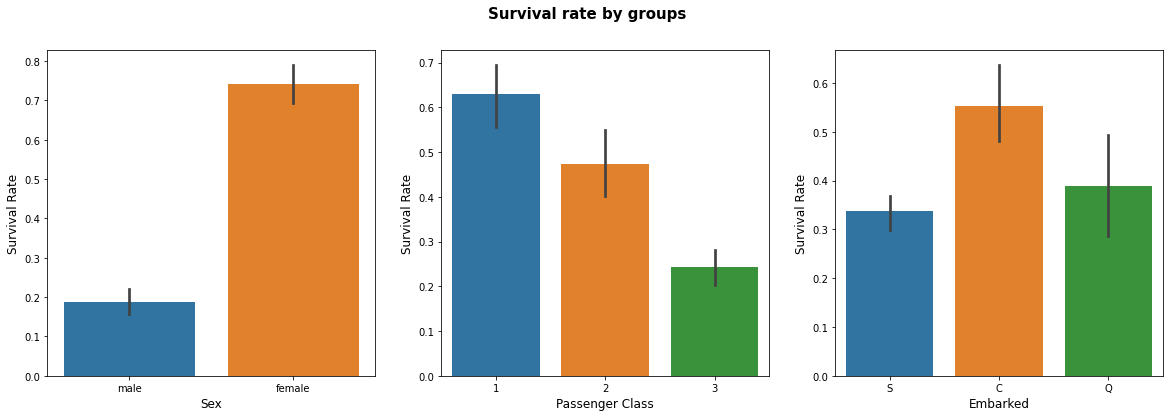

In [15]:
fig, (axis1, axis2, axis3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Survival rate by groups', fontsize=15, fontweight='bold')

sns.barplot(x='Sex', y='Survived', data=df, ax=axis1)
axis1.set_xlabel('Sex', fontsize=12)
axis1.set_ylabel('Survival Rate', fontsize=12)

sns.barplot(x='Pclass', y='Survived', data=df, ax=axis2)
axis2.set_xlabel('Passenger Class', fontsize=12)
axis2.set_ylabel('Survival Rate', fontsize=12)

sns.barplot(x='Embarked', y='Survived', data=df, ax=axis3)
axis3.set_xlabel('Embarked', fontsize=12)
axis3.set_ylabel('Survival Rate', fontsize=12)

plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

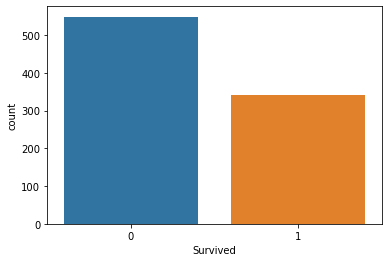

In [16]:
sns.countplot(df.Survived)

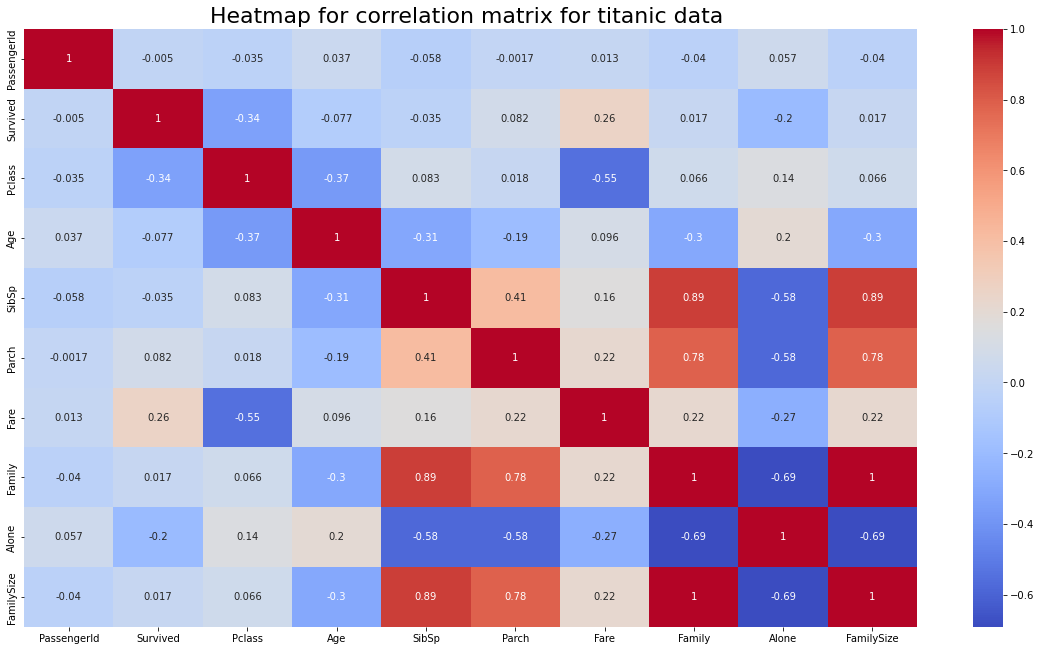

In [17]:
plt.figure(figsize = (20,11))

sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')

plt.title("Heatmap for correlation matrix for titanic data ", fontsize = 22)
plt.show()

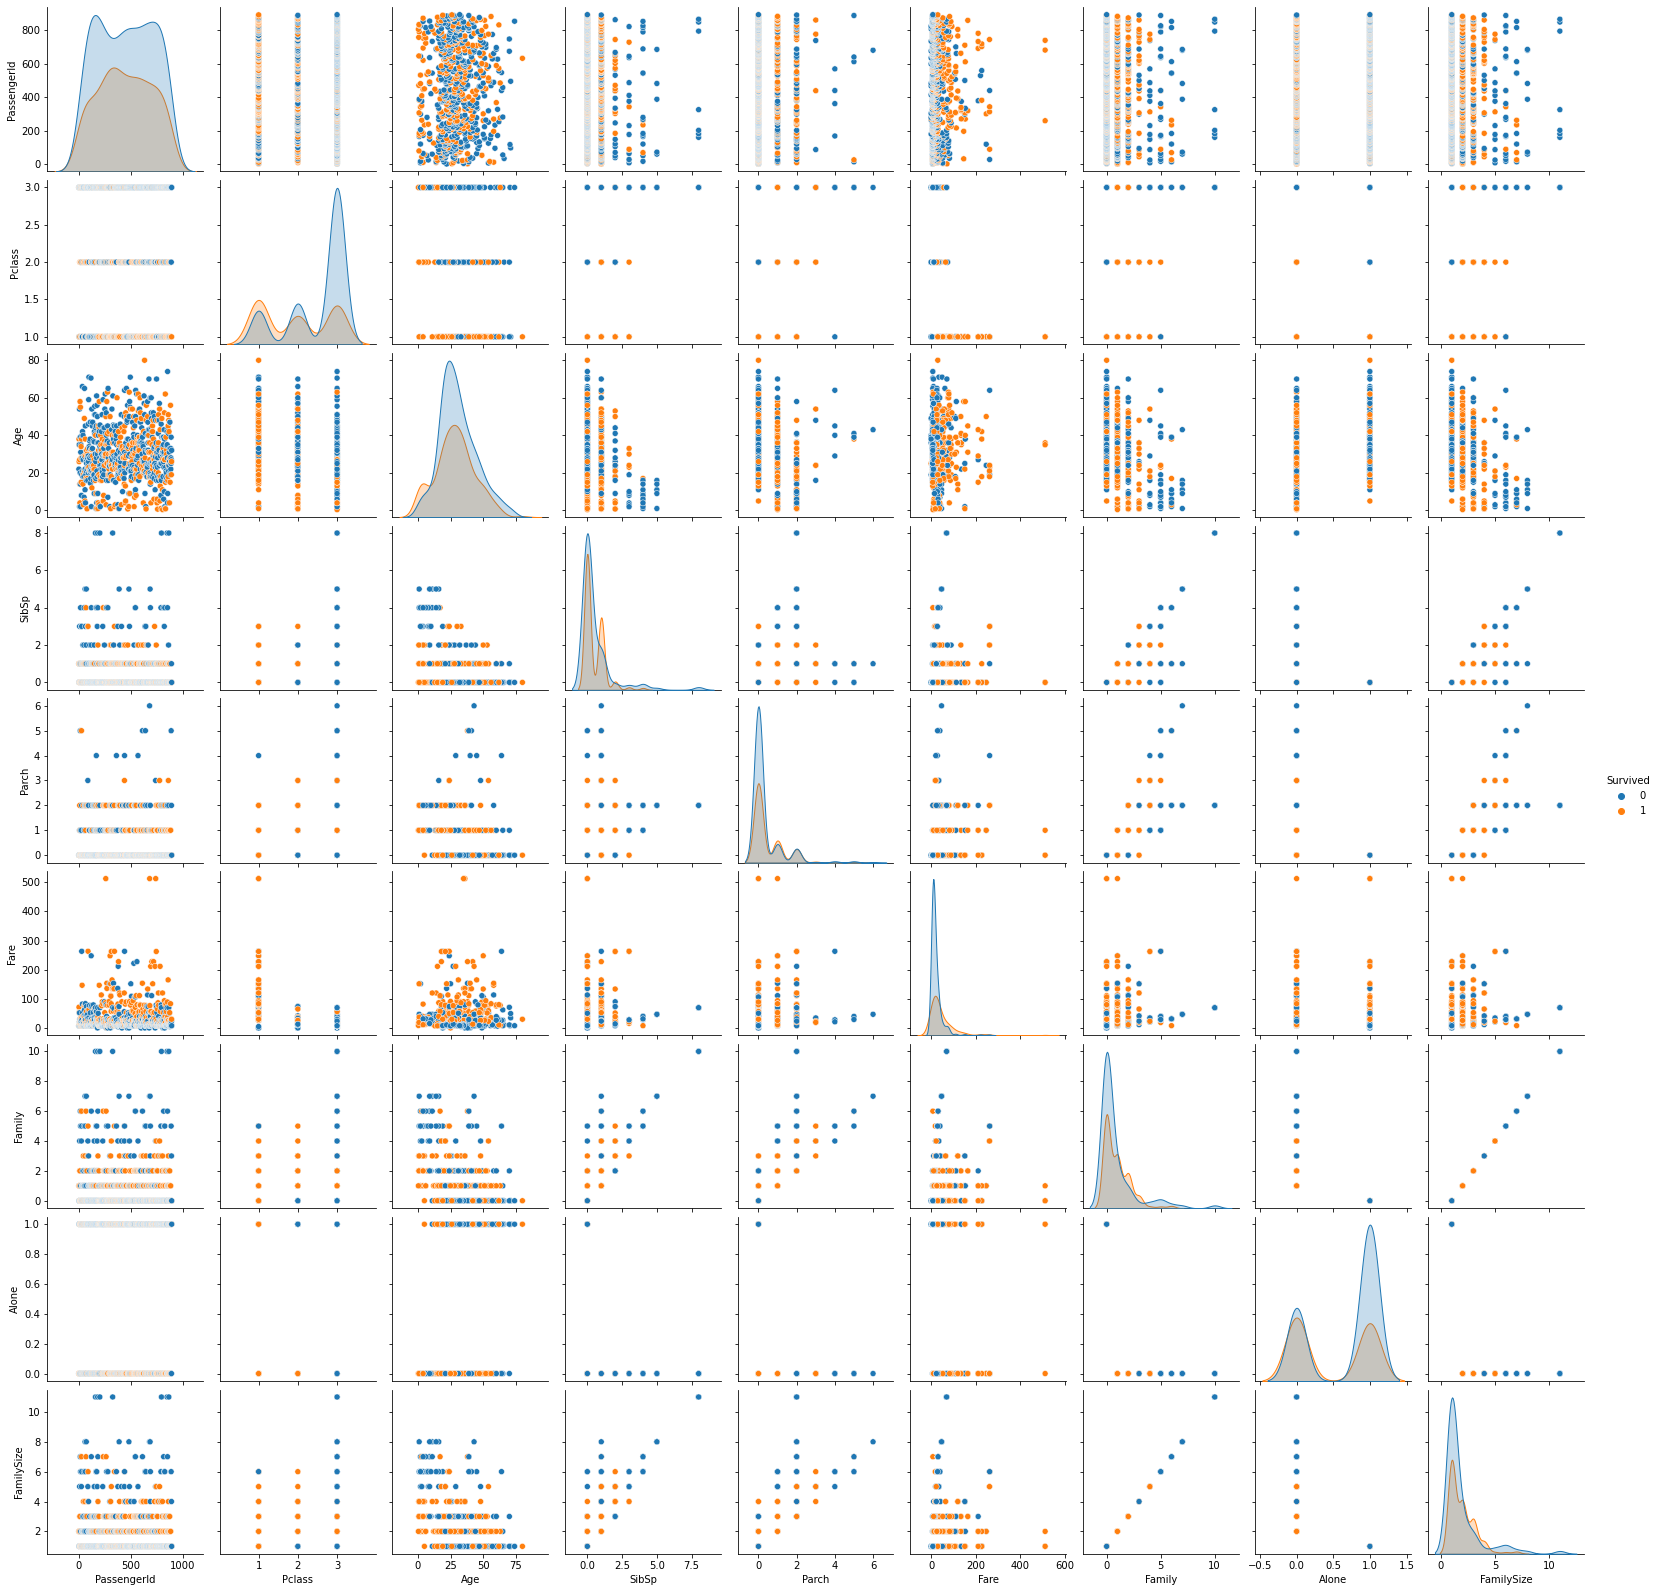

In [18]:
sns.pairplot(df, hue = "Survived")